In [1]:
import findspark
findspark.init()

In [2]:
import pandas as pd
import numpy as np
import pyspark

In [2]:
from pyspark.sql import functions as f
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Analytics")\
        .getOrCreate()


## 1. Reading Data

In [5]:
pre_data = spark.read.csv(
    r'F:\Data_Engineering\Apache_Spark\data\stocks_price_final.csv',
    sep = ',',
    header = True,
)
pre_data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [6]:
pre_data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



### Change data schema

In [7]:
from pyspark.sql.types import *
#  |-- _c0: string (nullable = true)
#  |-- symbol: string (nullable = true)
#  |-- date: string (nullable = true)
#  |-- open: string (nullable = true)
#  |-- high: string (nullable = true)
#  |-- low: string (nullable = true)
#  |-- close: string (nullable = true)
#  |-- volume: string (nullable = true)
#  |-- adjusted: string (nullable = true)
#  |-- market.cap: string (nullable = true)
#  |-- sector: string (nullable = true)
#  |-- industry: string (nullable = true)
#  |-- exchange: string (nullable = true)
schema = [
    StructField("_c0", IntegerType(), True),
    StructField("symbol", StringType(), True),
    StructField("date", DateType(), True),
    StructField("open", DoubleType(), True),
    StructField("high", DoubleType(), True),
    StructField("low", DoubleType(), True),
    StructField("close", DoubleType(), True),
    StructField("volume", IntegerType(), True),
    StructField("adjusted", DoubleType(), True),
    StructField("market.cap", StringType(), True),
    StructField("sector", StringType(), True),
    StructField("industry", StringType(), True),
    StructField("exchange", StringType(), True),
]

final_StructType = StructType(fields = schema)

In [8]:

data = spark.read.csv(
    r'F:\Data_Engineering\Apache_Spark\data\stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_StructType
)

In [9]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [10]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [55]:
data = data.withColumnRenamed('market.cap', 'market_cap')

## 2. EDA

In [56]:
data.schema

StructType([StructField('_c0', IntegerType(), True), StructField('symbol', StringType(), True), StructField('date', DateType(), True), StructField('open', DoubleType(), True), StructField('high', DoubleType(), True), StructField('low', DoubleType(), True), StructField('close', DoubleType(), True), StructField('volume', IntegerType(), True), StructField('adjusted', DoubleType(), True), StructField('market_cap', StringType(), True), StructField('sector', StringType(), True), StructField('industry', StringType(), True), StructField('exchange', StringType(), True)])

In [57]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('date', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market_cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [58]:
data.head(5)

[Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', date=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', date=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', date=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market_cap='$9.31B', sector='Capit

In [59]:
data.first()


Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [60]:
data.describe().show()

+-------+------------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|summary|               _c0| symbol|              open|              high|               low|             close|            volume|          adjusted|market_cap|          sector|            industry|exchange|
+-------+------------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|  count|           1729034|1729034|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|   1729034|         1729034|             1729034| 1729034|
|   mean|          864517.5|   NULL|15070.071703341047|15555.067268137092|14557.808227578982|15032.714854330708|1397692.1627885813|  14926.1096887955|      NULL|   

In [61]:
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [62]:
data.count()

1729034

In [63]:
data.distinct().count()

1729034

## 3. Data Transformation

In [64]:
data = data.withColumnRenamed('date','data_changed')

data.show(5)

+---+------+------------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|data_changed|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+------------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|  2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|  2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|  2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|  2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|  2019-09-18|56

In [65]:
data = data.withColumnRenamed('_c0','id')

In [66]:
data = data.drop('data_changed')

### Imputing missing data

### Data Selection

In [67]:
data.columns

['id',
 'symbol',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

**Select**

In [68]:
data.select(['open',
            'high',
            'low',
            'close',
            'volume',
            'adjusted'])\
            .describe()\
            .show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              open|              high|               low|             close|            volume|          adjusted|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|           1726301|           1726301|           1726301|           1726301|           1725207|           1726301|
|   mean|15070.071703341047|15555.067268137092|14557.808227578982|15032.714854330708|1397692.1627885813|  14926.1096887955|
| stddev|1111821.8002863158|1148247.1953514998|1072968.1558434244| 1109755.929400059| 5187522.908169215|1101877.6328940145|
|    min|             0.072|             0.078|             0.052|             0.071|                 0|         -1.230099|
|    max|      1.60168176E8|      1.61601456E8|      1.55151728E8|      1.58376592E8|         656504200|      1.57249392E8|
+-------

**Filter**

In [69]:
data.show(5)

+---+------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
| id|symbol|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|56.849998|    62.27|55.650002|     62.0|1589600|     62.0|    $9.31B|Capital Goods|Biotechnology: La...|  

In [74]:
from pyspark.sql.functions import col, lit

data.where( (col('date') >= lit('2020-01-01'))
            & (col('date') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close|volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

**Between**

In [38]:
data.filter(data.adjusted.between(100.0,500.0)).show(5)

+----+------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  id|symbol|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|  ABMD|    307.25| 311.73999|293.660004|302.290009|665300|302.290009|   $13.3

**Between**

In [39]:
data.filter(data.adjusted.between(100.0,500.0)).show(5)

+----+------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  id|symbol|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|  ABMD|    307.25| 311.73999|293.660004|302.290009|665300|302.290009|   $13.3

**When**

In [40]:
data.select('open','close',
            f.when(data.adjusted >= 200.0,1).otherwise(0)).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



**Like**

In [43]:
data.select('sector',
            data.sector.rlike('^[B,C]').alias('Sector Starting with letter B or C')
            ).distinct().show()

+--------------------+----------------------------------+
|              sector|Sector Starting with letter B or C|
+--------------------+----------------------------------+
|         Health Care|                             false|
|       Capital Goods|                              true|
|Consumer Non-Dura...|                              true|
|    Public Utilities|                             false|
|   Consumer Durables|                              true|
|             Finance|                             false|
|      Transportation|                             false|
|       Miscellaneous|                             false|
|   Consumer Services|                              true|
|              Energy|                             false|
|    Basic Industries|                              true|
|          Technology|                             false|
+--------------------+----------------------------------+



**GroupBy**

In [44]:
data.select(['industry','open','close','adjusted']).groupBy('industry').mean().show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714286| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938776| 16.35987909030613|16.148959322959183|
|Investment Banker...| 58.95058094575033|58.983085960826266| 58.15783725890302|
|   Food Distributors| 43.27450856935471| 43.27317810574861|42.910476083578686|
|Miscellaneous man...|15.660586409948996|15.650934860969391|15.369818847193873|
|    Ophthalmic Goods|108.50137892138574| 108.5404598760826| 108.5251612105263|
|        Broadcasting|24.916787464825248|24.917388455395155| 24.69910202962529|
|Agricultural Chem...|22.046413928996625| 22.04205107631803| 21.63509341815477|
|Biotechnology: Bi...|24.808083192324514|24.803587149935453|24.745079978273214|
|Other Specialty S...| 84.80718810562846

**Aggregation**

In [48]:
data.columns

['id',
 'symbol',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [12]:
from pyspark.sql.functions import mean, min, max, col, avg, lit

data.groupBy('sector') \
    .agg(min('date').alias('From'),
         max('date').alias('To'),

        min("open").alias('Min Open'),
        max("open").alias('Max Open'),
        avg("open").alias('Avg Open'),

        min("close").alias('Min Close'),
        max("close").alias('Max Close'),
        avg("close").alias('Avg Close'),

        min("adjusted").alias('Min Adjusted'),
        max("adjusted").alias('Max Adjusted'),
        avg("adjusted").alias('Avg Adjusted'),

    ).show(truncate=False)

+---------------------+----------+----------+--------+------------+------------------+---------+------------+------------------+------------+------------+------------------+
|sector               |From      |To        |Min Open|Max Open    |Avg Open          |Min Close|Max Close   |Avg Close         |Min Adjusted|Max Adjusted|Avg Adjusted      |
+---------------------+----------+----------+--------+------------+------------------+---------+------------+------------------+------------+------------+------------------+
|Miscellaneous        |2019-01-02|2020-07-22|0.147   |1059.98999  |52.03839496900615 |0.1361   |1035.829956 |52.06362854950962 |0.1361      |1035.829956 |51.80973033632277 |
|Health Care          |2019-01-02|2020-07-22|0.072   |186000.0    |119.96763306523039|0.071    |187000.0    |119.07806125418776|0.071       |187000.0    |118.97394778015986|
|Public Utilities     |2019-01-02|2020-07-22|0.331   |280.0       |35.58077735239443 |0.325    |282.220001  |35.58528245861935 |0.

Obtain minimum, maximum and average data of the sectors from Jan 2019 to jan 2020

In [13]:
data.filter( (col('date') >= lit('2020-01-01')) & (col('date') <= lit('2020-01-31')) )\
    .groupBy('sector') \
    .agg(min('date').alias('From'),
         max('date').alias('To'),

        min("open").alias('Min Open'),
        max("open").alias('Max Open'),
        avg("open").alias('Avg Open'),

        min("close").alias('Min Close'),
        max("close").alias('Max Close'),
        avg("close").alias('Avg Close'),

        min("adjusted").alias('Min Adjusted'),
        max("adjusted").alias('Max Adjusted'),
        avg("adjusted").alias('Avg Adjusted'),

    ).show(truncate=False)

+---------------------+----------+----------+--------+-----------+------------------+---------+-----------+------------------+------------+------------+------------------+
|sector               |From      |To        |Min Open|Max Open   |Avg Open          |Min Close|Max Close  |Avg Close         |Min Adjusted|Max Adjusted|Avg Adjusted      |
+---------------------+----------+----------+--------+-----------+------------------+---------+-----------+------------------+------------+------------+------------------+
|Miscellaneous        |2020-01-02|2020-01-31|0.345   |690.0      |56.73087533892131 |0.343    |691.099976 |56.86539617201169 |0.343       |691.099976  |56.69824742893589 |
|Health Care          |2020-01-02|2020-01-31|0.2     |47000.0    |85.47881956441606 |0.22     |46000.0    |84.48258861281404 |0.22        |46000.0     |84.40630277748323 |
|Public Utilities     |2020-01-02|2020-01-31|0.82    |269.459991 |38.03926521582173 |0.82     |269.929993 |38.08922524321552 |0.82        |2

In [15]:
# create temp table
data.createOrReplaceTempView('temp_table')
spark.sql("select * from temp_table where adjusted=500").show()

+------+------+----------+----------+----------+----------+-----+-------+--------+----------+-----------------+--------------------+--------+
|   _c0|symbol|      date|      open|      high|       low|close| volume|adjusted|market.cap|           sector|            industry|exchange|
+------+------+----------+----------+----------+----------+-----+-------+--------+----------+-----------------+--------------------+--------+
|455658|  IMBI|2019-02-11|     560.0|     560.0|     490.0|500.0|    200|   500.0|   $33.13M|Consumer Services|Catalog/Specialty...|  NASDAQ|
|455659|  IMBI|2019-02-12|     500.0|     520.0|     490.0|500.0|    600|   500.0|   $33.13M|Consumer Services|Catalog/Specialty...|  NASDAQ|
|455671|  IMBI|2019-03-01|     540.0|     540.0|     500.0|500.0|    100|   500.0|   $33.13M|Consumer Services|Catalog/Specialty...|  NASDAQ|
|455797|  IMBI|2019-08-29|     420.0|     550.0|     420.0|500.0|  11000|   500.0|   $33.13M|Consumer Services|Catalog/Specialty...|  NASDAQ|
|45582

## Data Visualization

In [16]:
post_df = data.select(['sector','open','close','adjusted']).groupBy('sector').mean().toPandas()

In [17]:
post_df

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Technology,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


<Axes: xlabel='sector'>

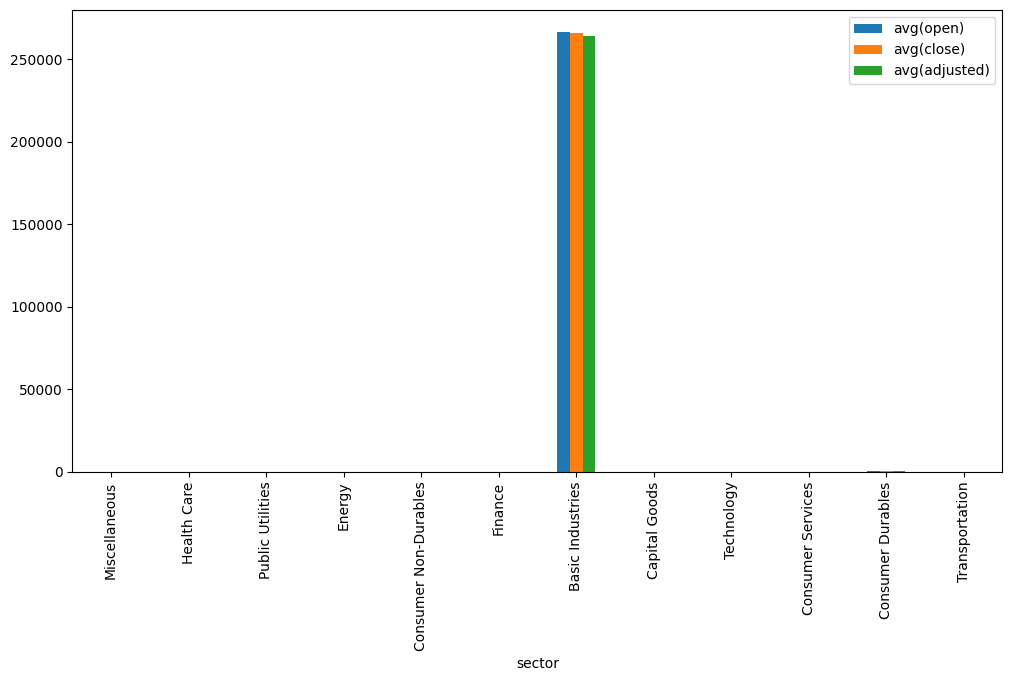

In [19]:
post_df.plot(kind='bar', x='sector', y=post_df.columns.tolist()[1:], figsize=(12,6))

Cut out some of the **industries**

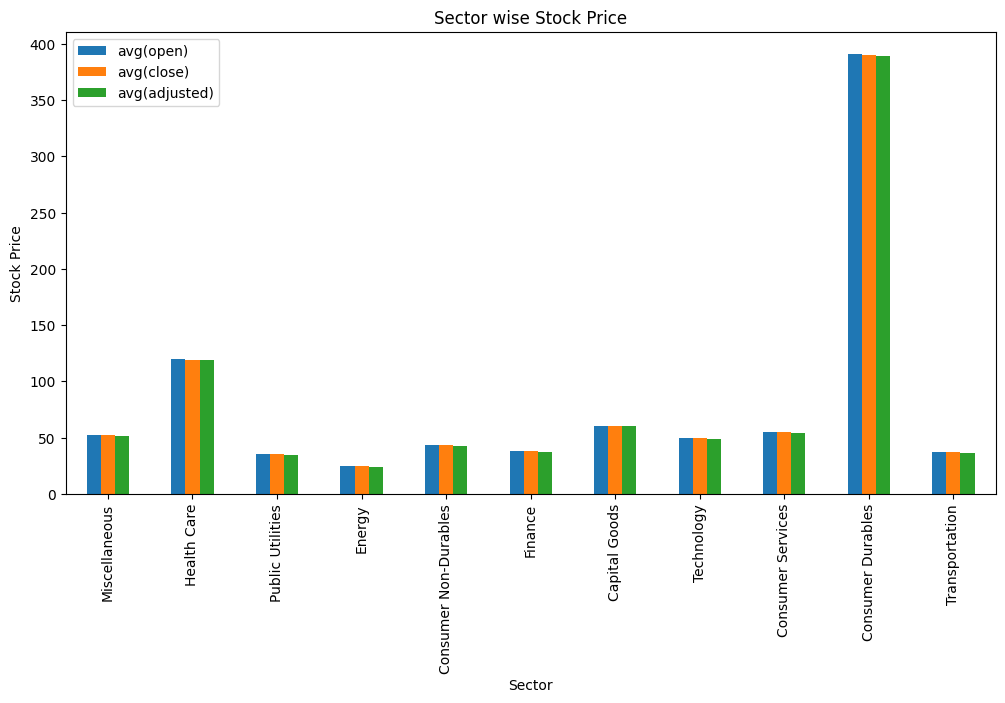

In [21]:
ind = list(range(12))
ind.pop(6)

post_df.iloc[ind, :].plot(kind='bar', x='sector', y=post_df.columns.tolist()[1:], figsize=(12,6),
             ylabel='Stock Price', xlabel='Sector', title='Sector wise Stock Price')
plt.show()

In [22]:
ind_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

In [24]:
ind_x.head()

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.369819


<Axes: ylabel='industry'>

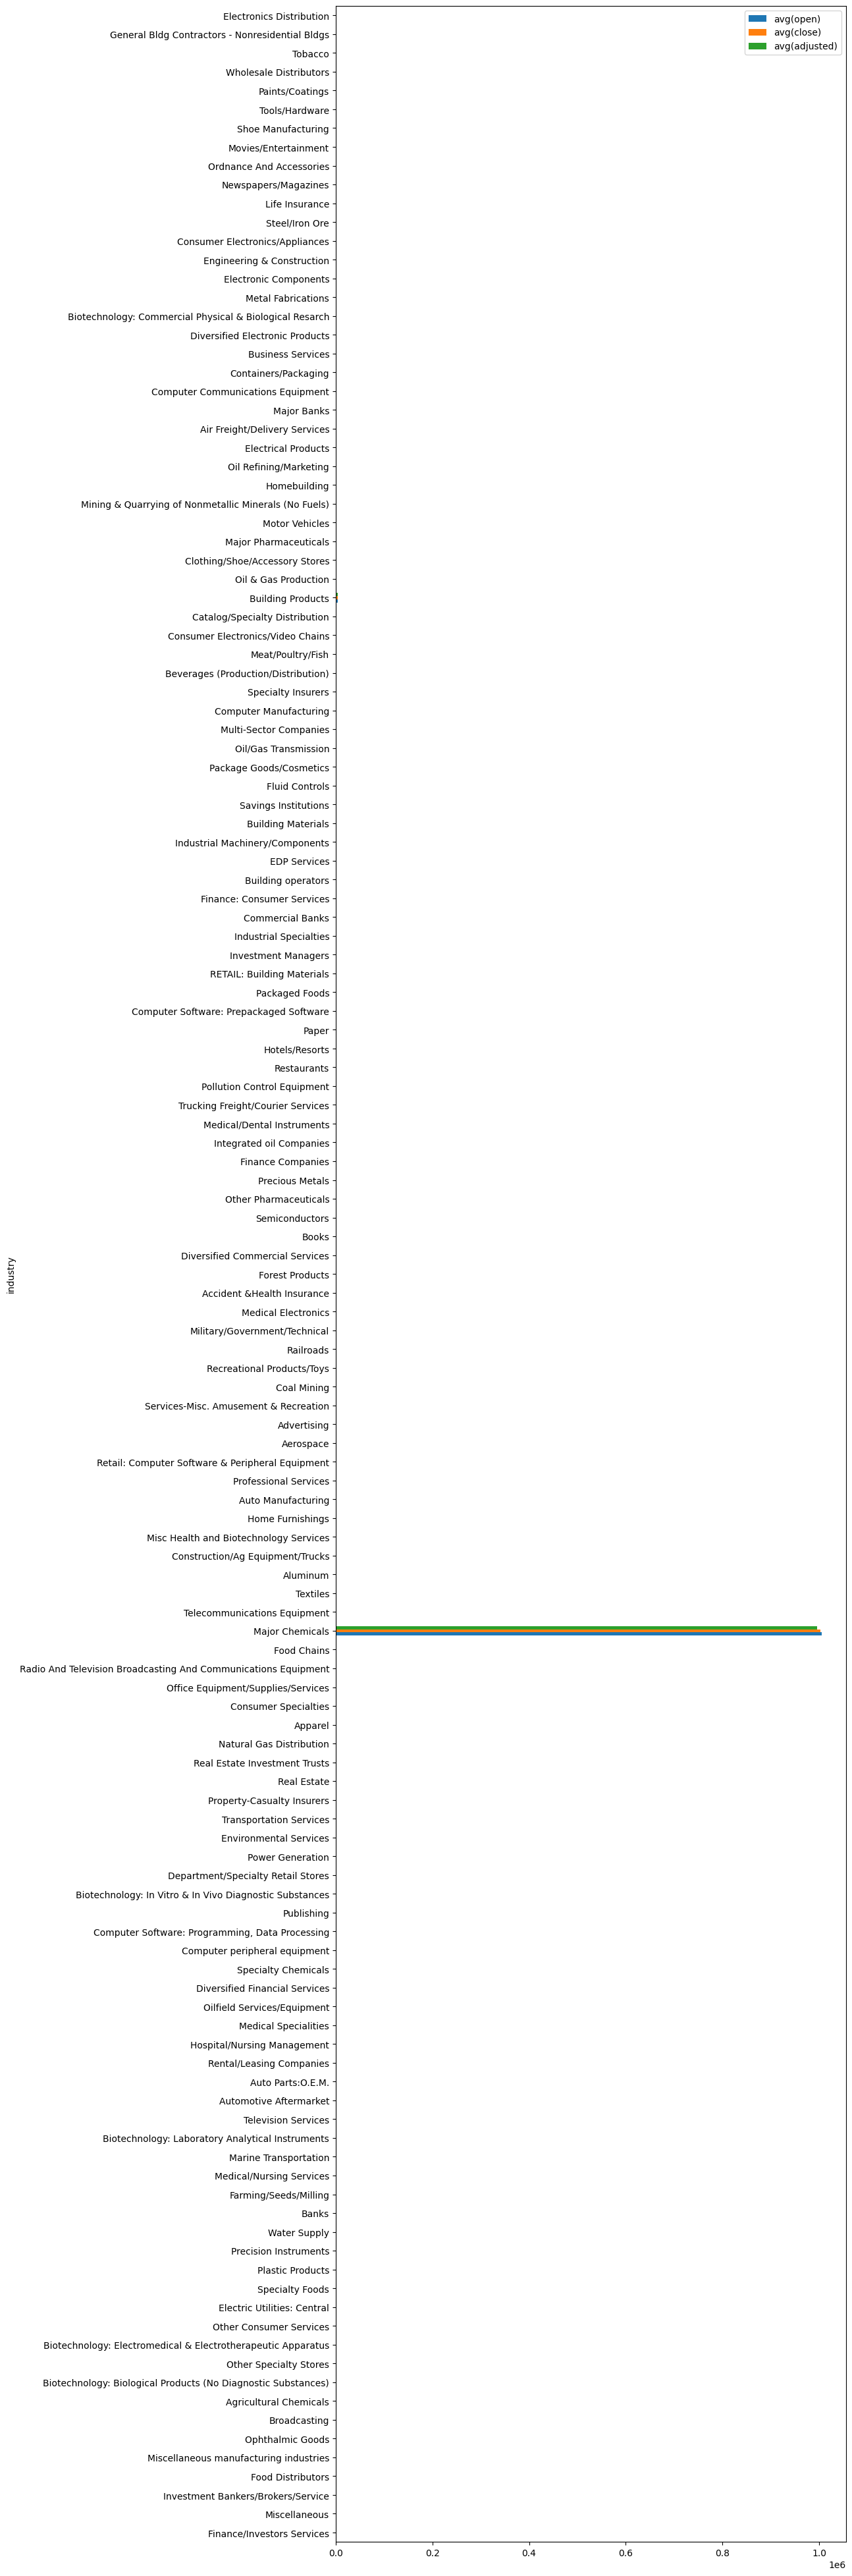

In [25]:
ind_x.plot(kind='barh', x='industry', y=ind_x.columns.tolist()[1:], figsize=(10,50))

Remove **Major Chemicals** and **Building Products** to see others clearly 

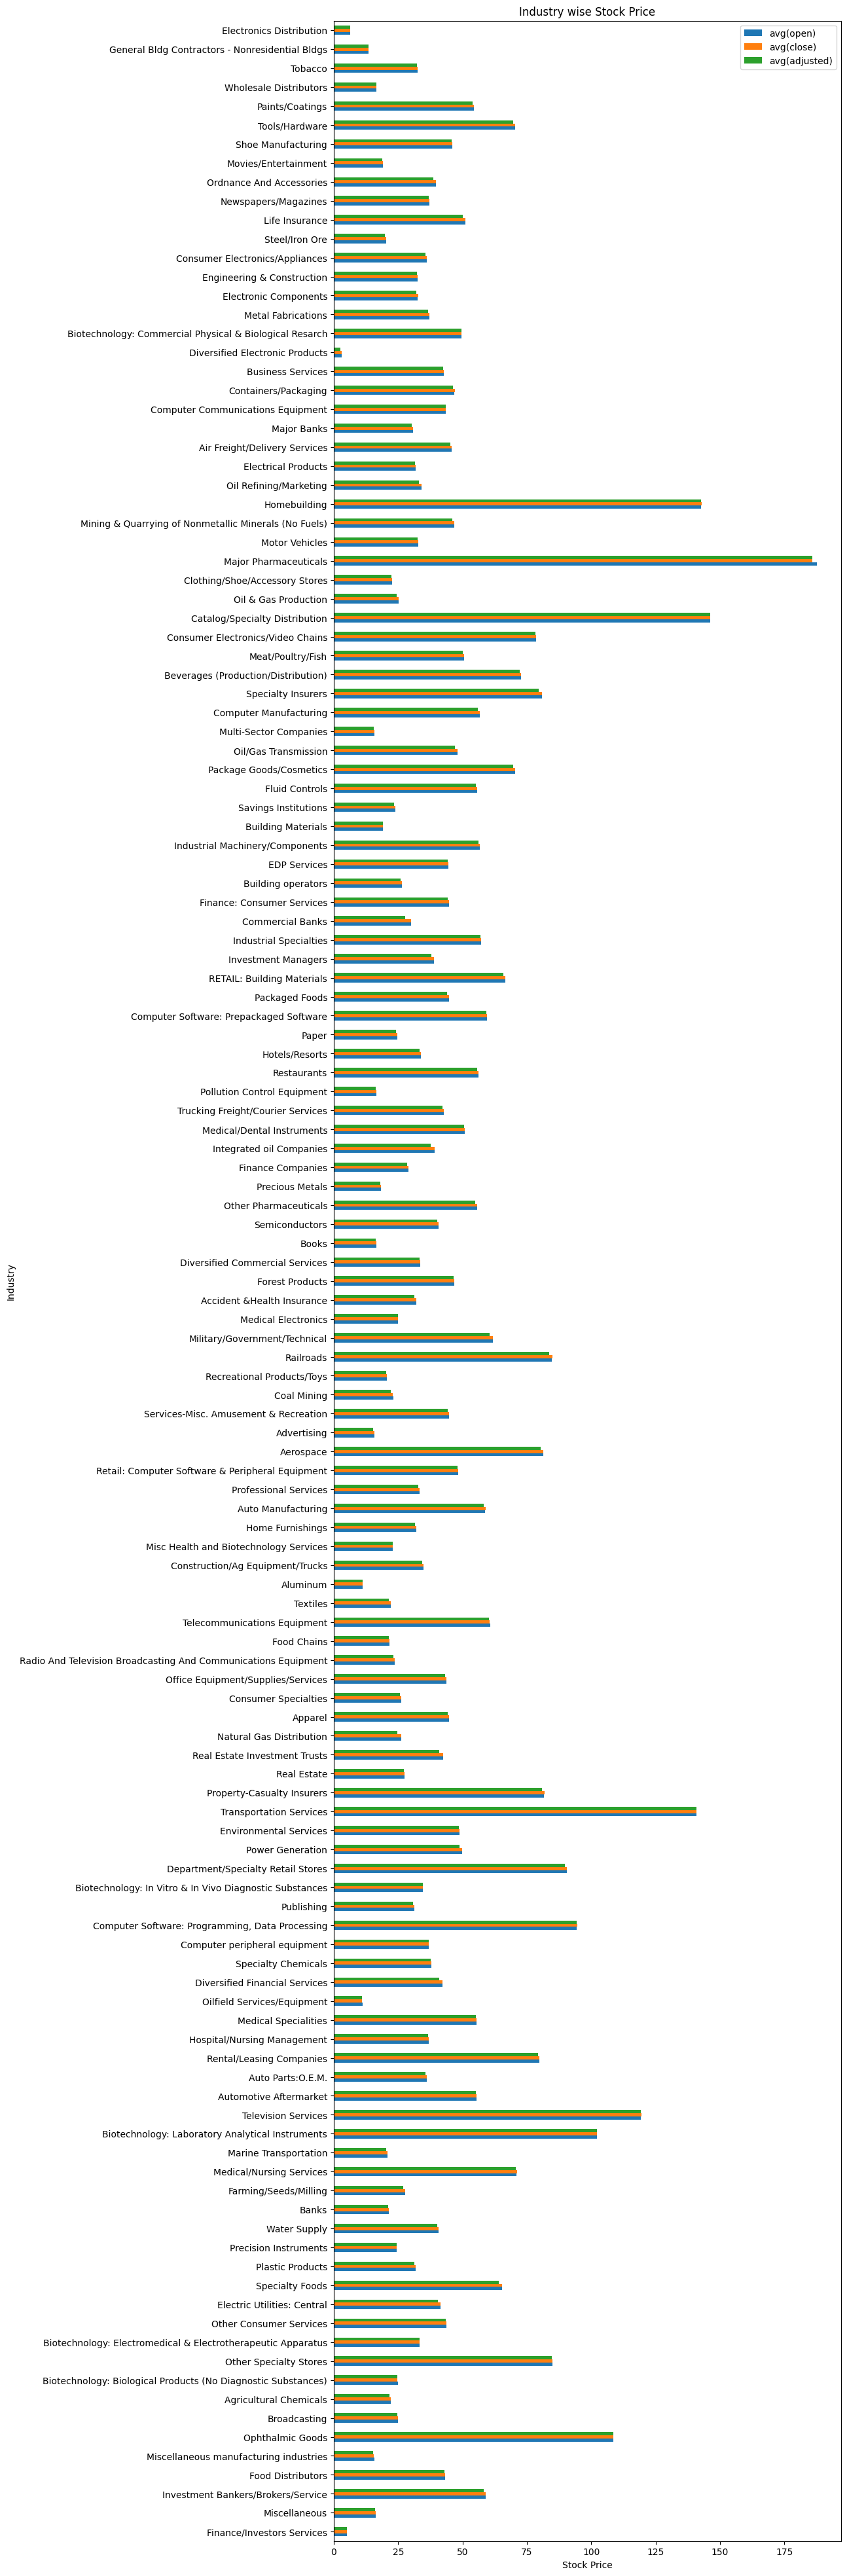

In [27]:
q = ind_x[(ind_x.industry != 'Major Chemicals') & (ind_x.industry != 'Building Products')]
q.plot(kind='barh', x='industry', y=q.columns.tolist()[1:], figsize=(10,50),
       xlabel='Stock Price', ylabel='Industry', title='Industry wise Stock Price')
plt.show()

In [29]:
tech = data.where(col('sector') == 'Technology').select('date', 'open', 'close', 'adjusted')

tech.show()

+----------+----+-----+--------+
|      date|open|close|adjusted|
+----------+----+-----+--------+
|2019-01-02|8.51| 8.55|    8.55|
|2019-01-03| 8.5| 8.59|    8.59|
|2019-01-04|8.72| 8.88|    8.88|
|2019-01-07|8.88| 8.86|    8.86|
|2019-01-08|8.93|  9.4|     9.4|
|2019-01-09|9.46| 9.43|    9.43|
|2019-01-10|9.41|  9.4|     9.4|
|2019-01-11|9.37| 9.51|    9.51|
|2019-01-14|9.45| 9.48|    9.48|
|2019-01-15| 9.5| 9.52|    9.52|
|2019-01-16|9.53| 9.52|    9.52|
|2019-01-17|9.22|  9.5|     9.5|
|2019-01-18|9.57| 9.41|    9.41|
|2019-01-22|9.31|  8.9|     8.9|
|2019-01-23|8.93| 8.83|    8.83|
|2019-01-24|8.84| 8.73|    8.73|
|2019-01-25| 8.8| 8.93|    8.93|
|2019-01-28|8.87| 8.83|    8.83|
|2019-01-29|8.82| 8.83|    8.83|
|2019-01-30| 8.9| 8.74|    8.74|
+----------+----+-----+--------+
only showing top 20 rows



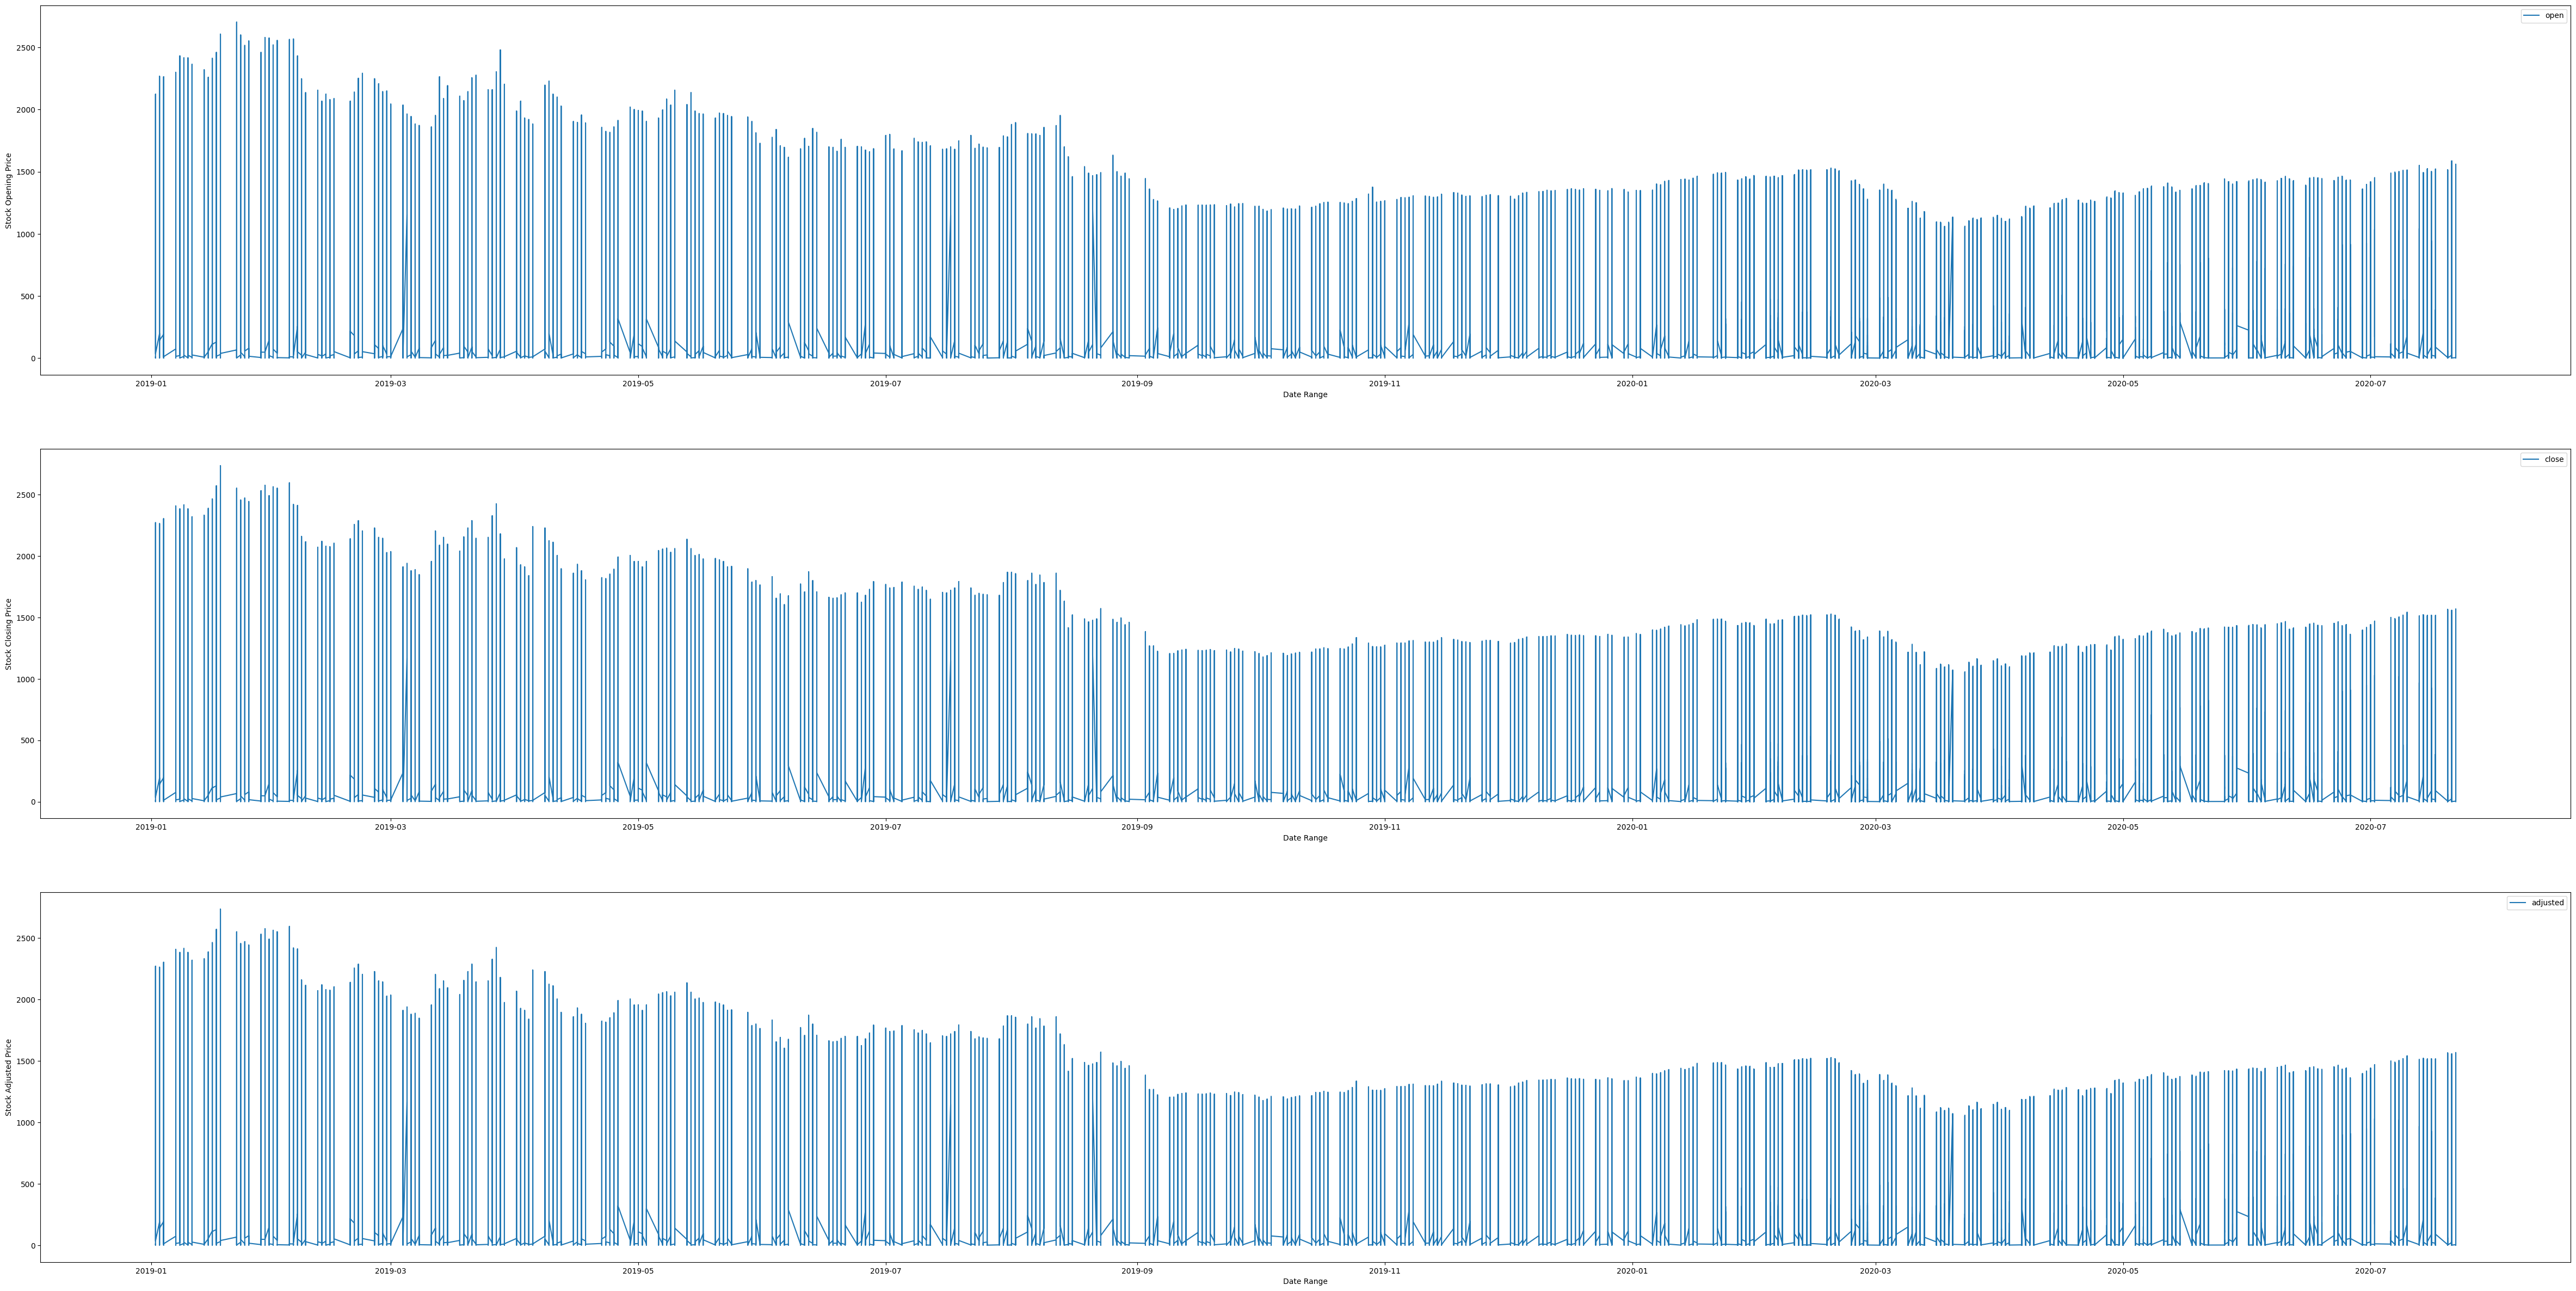

In [31]:
fig,axes = plt.subplots(3,1,figsize=(60,30))

tech.toPandas().plot(kind = 'line', x='date', y='open', xlabel='Date Range', ylabel='Stock Opening Price', ax=axes[0])
tech.toPandas().plot(kind = 'line', x='date', y='close', xlabel='Date Range', ylabel='Stock Closing Price', ax=axes[1])
tech.toPandas().plot(kind = 'line', x='date', y='adjusted', xlabel='Date Range', ylabel='Stock Adjusted Price', ax=axes[2])

plt.show()

## Read and Save Data to files

In [36]:
# CSV
data.write.csv('F:\Data_Engineering\Apache_Spark\data\stocks_price.csv')

# JSON
data.write.save('F:\Data_Engineering\Apache_Spark\data\stocks_price.json', format='json')

# Parquet
data.write.save('F:\Data_Engineering\Apache_Spark\data\stocks_price.parquet', format='parquet')

# Writing selected data to different file formats

# CSV 
data.select(['date','open','close','adjusted'])\
    .write.csv('F:\Data_Engineering\Apache_Spark\data\stocks_price_1.csv', header=True)

# JSON
data.select(['date','open','close','adjusted'])\
    .write.save('F:\Data_Engineering\Apache_Spark\data\stocks_price_1.json', format='json')

# Parquet
data.select(['date','open','close','adjusted'])\
    .write.save('F:\Data_Engineering\Apache_Spark\data\stocks_price_1.parquet', format='parquet')

In [49]:
post_df

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Technology,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


,avg(open),avg(close),avg(adjusted)
0,52.038395,52.063629,51.809730
1,119.967633,119.078061,118.973948
2,35.580777,35.585282,34.730156
3,24.456590,24.427350,23.684714
4,43.328603,43.330386,42.817625
5,37.774667,37.779002,37.100285
6,266410.354701,265750.361367,263865.510703
7,60.488544,60.516555,59.975123
8,49.516045,49.534799,49.252340
9,55.078867,55.055248,54.361878


<Axes: >

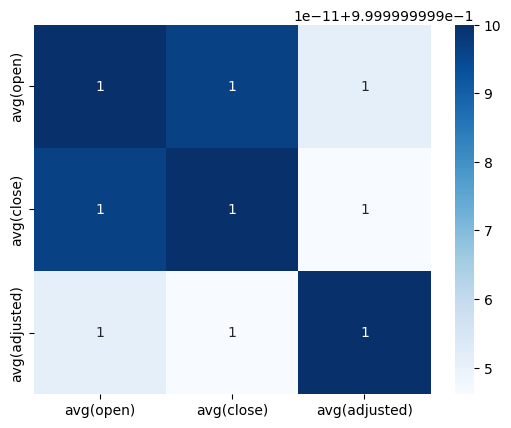

In [56]:
corr = post_df.iloc[:,1:].corr()
sns.heatmap(corr, cmap = 'Blues',annot=True)